1.Identification of Relevant Datasets
2.Cleansing and data transformation
3.Visualization
    3.1 Top 15 Most Popular Words
    3.2 Visualization for Share of different neighbourhood group
    3.3 Visualization for Representing different neighbourhood groups wrt Longitude vs Latitude
    3.4 Visualization for Top 10 Most Popular Airbnb Hosts
    3.5 Visualization for Number of Airbnb at Each Location
    3.6 Visualization for Number of Reviews at Each Location
    3.7 Visualization for Location Wise Room Type Occupancy
    3.8 Visualization for Pairwise Correlation of Selected Variables in Dataset
4.Prediction Modeling

# Identification of Relevant Datasets

In [1]:
#!pip install nltk
#!pip install -U scikit-learn scipy matplotlib
#!pip install stop-words
#!pip install plotly==4.1.0

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


# import plotly as plotly
# import plotly.express as px
# from plotly import __version__
# import plotly.offline as py 
# from plotly.offline import init_notebook_mode, plot
# init_notebook_mode(connected=True)
# from plotly import tools
# import plotly.graph_objs as go
# import nltk
# import os
import nltk.corpus
# from nltk.stem import LancasterStemmer

csv = pd.read_csv("AB_NYC_2019.csv")
csv

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


# Data transformation

In [2]:
dfairbnb=csv.fillna(0)

# Checking unique values in the columns of the dataframe

In [3]:
print('\nRows : ',dfairbnb.shape[0])
print('\nColumns :', dfairbnb.shape[1])
print('\nColumns:',dfairbnb.columns.to_list())
print(' \nUnique:\n',dfairbnb.nunique())

('\nRows : ', 48895)
('\nColumns :', 16)
('\nColumns:', ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'])
(' \nUnique:\n', id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1765
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64)


# Data Cleansing

In [4]:
dfairbnb.drop(["id","host_name","last_review","reviews_per_month"], axis = 1, inplace = True)
dfairbnb.drop( dfairbnb[ dfairbnb['price'] == 0 ].index , inplace=True)
dfairbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,4,188


# Data Visualization

### Top 15 Most Popular Words

In [36]:
#Read the CSV file
Bnb =dfairbnb.head(5000)
Bnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Cozy room in NYC,5164854,Manhattan,Harlem,40.82071,-73.93813,Private room,45,6,13,8,346
4996,Bedroom in Williamsburg w/ Terrace,18105672,Brooklyn,Williamsburg,40.71659,-73.94580,Private room,90,30,1,1,0
4997,Bedr w Priv Bathr+Balc 15m frm city,6150064,Queens,Astoria,40.76972,-73.92060,Private room,85,2,2,1,0
4998,Charming bedroom in Comfy apt,18115202,Manhattan,East Village,40.72960,-73.99054,Private room,85,1,0,1,0


In [7]:
#Transfer to Dataframe
dt=pd.DataFrame(Bnb['name'])
dt = pd.DataFrame(' '.join(dt['name'].astype(str).tolist()), columns=['name'], index=[0])
dt= dt.apply(lambda x: x.astype(str).str.lower())
txt = dt['name'].astype(str)

In [8]:
# importing word_tokenize from nltk and stop_words from get_stop_words
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words

# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(txt[0])

#Gets all the Stop words in English Language and remove it from the token
stop_words = get_stop_words('english')
token = [x for x in token if x not in stop_words]

#Remove all the special characters and numbers from the token
token = [x for x in token if x.isalpha()==True]
token

['clean',
 'quiet',
 'apt',
 'home',
 'park',
 'skylit',
 'midtown',
 'castle',
 'village',
 'harlem',
 'york',
 'cozy',
 'entire',
 'floor',
 'brownstone',
 'entire',
 'apt',
 'spacious',
 'central',
 'park',
 'large',
 'cozy',
 'br',
 'apartment',
 'midtown',
 'east',
 'blissartsspace',
 'large',
 'furnished',
 'room',
 'near',
 'cozy',
 'clean',
 'guest',
 'room',
 'family',
 'apt',
 'cute',
 'cozy',
 'lower',
 'east',
 'side',
 'bdrm',
 'beautiful',
 'upper',
 'west',
 'side',
 'central',
 'broadway',
 'lovely',
 'room',
 'garden',
 'best',
 'area',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'manhattan',
 'singles',
 'west',
 'village',
 'nest',
 'superhost',
 'stops',
 'manhattan',
 'studio',
 'perfect',
 'parents',
 'garden',
 'chelsea',
 'perfect',
 'hip',
 'historic',
 'brownstone',
 'apartment',
 'backyard',
 'huge',
 'br',
 'upper',
 'east',
 'cental',
 'park',
 'sweet',
 'spacious',
 'brooklyn',
 'loft',
 'cbg',
 'ctybgd',
 'helpshaiti',
 'rm',
 'cbg',
 'helps

In [9]:
from nltk.probability import FreqDist
#Finding the Frequency Distribution of a word
fdist = FreqDist(token)
fdist
#Gets the top occuring tokens
fdist1 = fdist.most_common(20)
final_data=pd.DataFrame(fdist1,columns=['Word','Frequency'])
final_data

,Word,Frequency
0,room,788
1,apt,656
2,private,589
3,bedroom,588
4,apartment,503
5,brooklyn,408
6,studio,387
7,sunny,372
8,loft,370
9,park,360


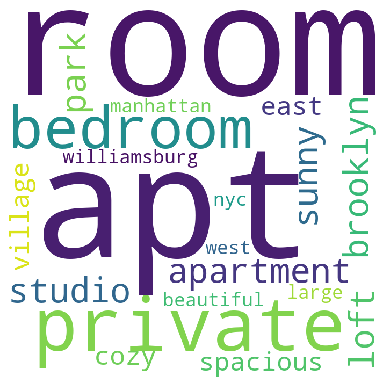

In [10]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
comment_words = ' '
for words in final_data['Word']: 
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 10)  
plt.show()

### Representing Share Of Different neighbourhood groups

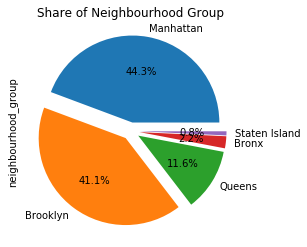

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

values = dfairbnb['neighbourhood_group'].value_counts()
colors = ['b', 'g', 'r', 'c', 'm']
explode = (0, 0.1, 0, 0, 0)
dfairbnb['neighbourhood_group'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%')
plt.title('Share of Neighbourhood Group')

plt.show()

### Longitude vs Latitude (Representing different neighbourhood groups)

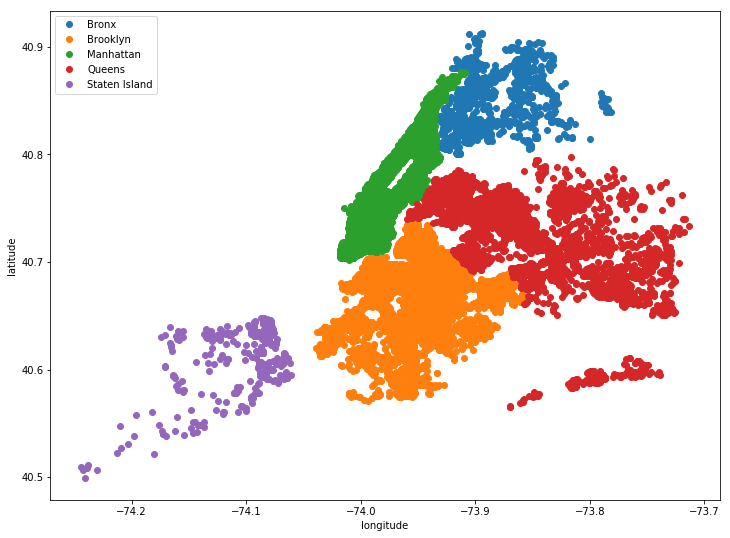

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
#plt.rcParams["figure.figsize"] = fig_size
fig,ax = plt.subplots()
groups = dfairbnb.groupby('neighbourhood_group')
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', label=name)
ax.legend(loc=2)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

### Top 10 Most Popular Airbnb Hosts

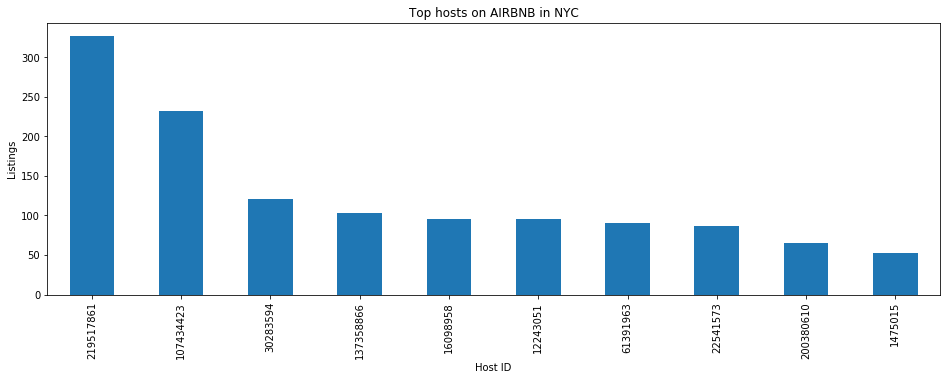

In [79]:
dfairbnb1=dfairbnb.host_id.value_counts()[:10]
f,ax = plt.subplots(figsize=(16,5))

ax=dfairbnb1.plot(kind='bar')
ax.set_xlabel('Host ID')
ax.set_ylabel('Listings')
ax.set_title("Top hosts on AIRBNB in NYC")
plt.show()

### Bar Graph to show Number of Airbnb at Each Location

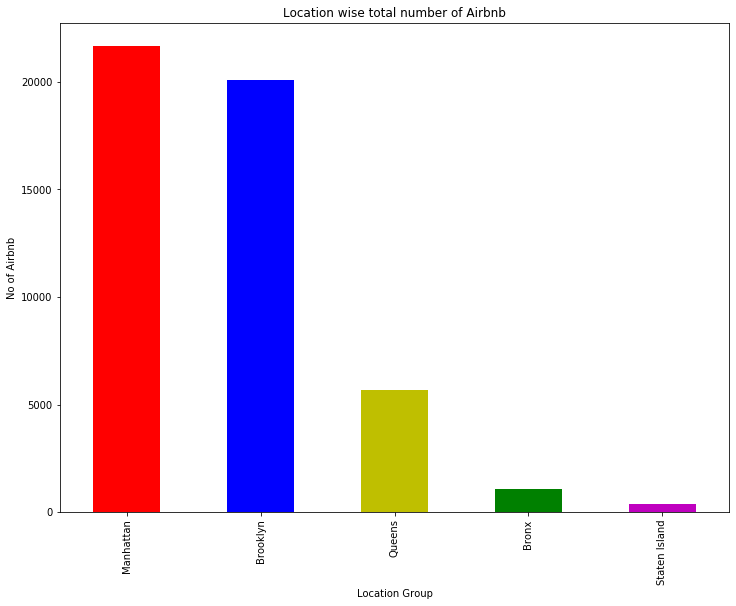

In [80]:
dfNeighbourhood = dfairbnb['neighbourhood_group'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
dfNeighbourhood.set_ylabel('No of Airbnb')
dfNeighbourhood.set_xlabel('Location Group')
plt.title('Location wise total number of Airbnb')

plt.show()

### Bar Graph to Show Number of Reviews at Each Location

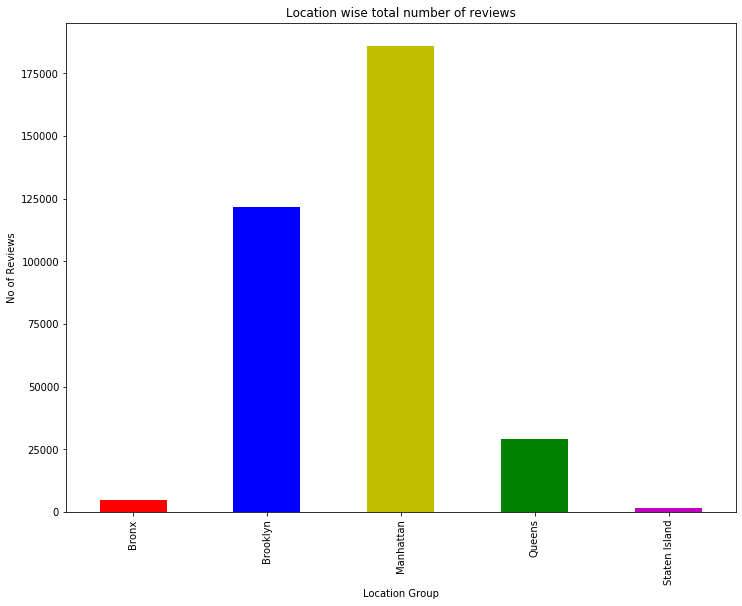

In [81]:
dfNoOfReviews=dfairbnb.groupby(['neighbourhood_group']).sum()

ax = dfNoOfReviews.plot(y = 4, kind = "bar", color=['r','b','y','g','m'], legend=False)
ax.set_ylabel('No of Reviews')
ax.set_xlabel('Location Group')

plt.title('Location wise total number of reviews')

plt.show()

### Bar Graph to Show Location Wise Room Type Occupancy

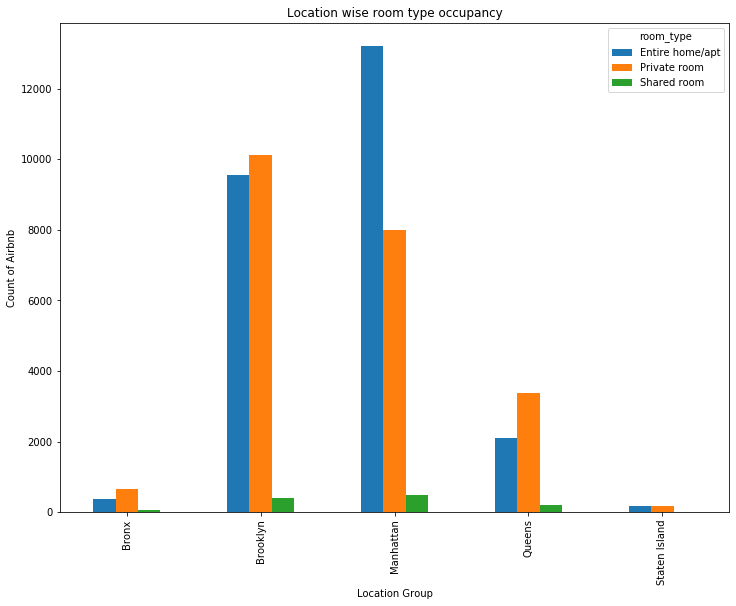

In [82]:
dfLocRoom = dfairbnb.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()

dfdraw = dfLocRoom.plot(kind = "bar")
dfdraw.set_ylabel('Count of Airbnb')
dfdraw.set_xlabel('Location Group')

plt.title('Location wise room type occupancy')

plt.show()

# Average price of a room according to the neighbourhood

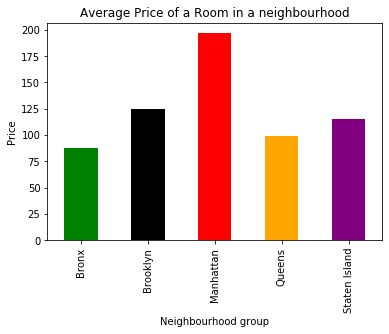

In [83]:
%matplotlib inline  

# this actually imports matplotlib
import matplotlib.pyplot as plt  
price_neighbourhood = dfairbnb.groupby(['neighbourhood_group'])['price'].agg('mean')
ax = price_neighbourhood .plot(y = 500, kind = "bar", color=['green','black','red','orange','purple'])
ax.set_ylabel('Price')
ax.set_xlabel('Neighbourhood group')

plt.title('Average Price of a Room in a neighbourhood')

plt.show()

# Box plot to see price range for different types of rooms

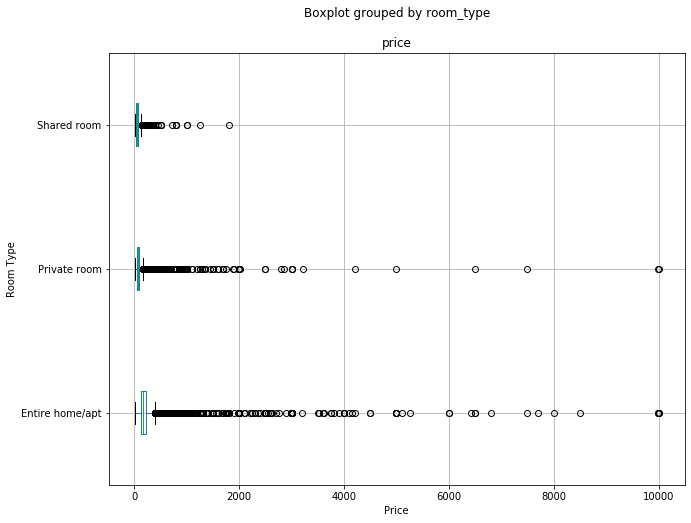

In [84]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d3=dfairbnb.copy()
ax=d3.boxplot(column='price', by='room_type', figsize=(10, 8),vert=False)
ax.set_ylabel('Room Type')
ax.set_xlabel('Price')

plt.show()

# Preprocessing and Preparing Data for Prediction

In [12]:
dfairbnb.drop(["host_id"], axis = 1, inplace = True)

dfairbnb.drop( dfairbnb[ dfairbnb['price'] == 0 ].index , inplace=True)
dfairbnb.sort_values(by=['price'],ascending=True).head(1000)
dt = dfairbnb
dt.sort_values(by=['price'],ascending=True).head(400)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
24100,"Girls only, cozy room one block from Times Square",Manhattan,Hell's Kitchen,40.75812,-73.98935,Shared room,10,1,2,1,0
32810,Gigantic Sunny Room in Park Slope-Private Back...,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home/apt,10,1,14,1,4
33225,Voted #1 Airbnb In NYC,Queens,Jamaica,40.68939,-73.79886,Entire home/apt,10,2,22,1,332
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",Manhattan,Upper West Side,40.76844,-73.98333,Private room,10,1,2,1,0
35601,"Charming, bright and brand new Bed-Stuy home",Brooklyn,Bedford-Stuyvesant,40.69508,-73.95164,Entire home/apt,10,3,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
46092,005 Comfy and Pleasant Shared Room,Staten Island,Concord,40.60625,-74.08900,Shared room,30,4,1,7,68
34069,Brooklyn Magic Bunk Share,Brooklyn,Bedford-Stuyvesant,40.69052,-73.94149,Shared room,30,1,32,17,83
16010,Sofa Bed Available in Midtown Manhattan,Manhattan,Hell's Kitchen,40.76455,-73.99128,Shared room,30,3,0,1,0
35099,Creative Bushwick - Cozy Private Room,Brooklyn,Bushwick,40.68880,-73.92015,Private room,30,1,18,1,93


# Prediction modeling - Linear Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfairbnb['neighbourhood_group'])
dfairbnb['neighbourhood_group']=le.transform(dfairbnb['neighbourhood_group'])

X_R1 = dfairbnb[['neighbourhood_group']]
y_R1 = dfairbnb[['price']]
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,test_size=0.2,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {: .3f}'
     .format(float(linreg.intercept_)))

linear model coeff (w): [[15.2302835]]
linear model intercept (b):  127.163


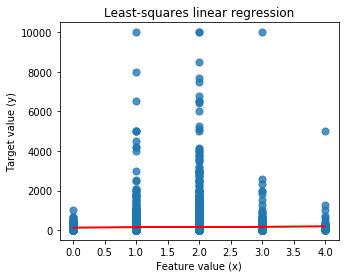

In [24]:
plt.figure(figsize=(5,4))
# s is size and alpha is optional (The alpha blending value, between 0 (transparent) and 1 (opaque))
plt.scatter(X_train, y_train, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [25]:
linreg = LinearRegression().fit(X_train, y_train)

print('AirBnb dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

AirBnb dataset
linear model intercept: [127.16295546]
linear model coeff:
[[15.2302835]]
R-squared score (training): 0.002
R-squared score (test): 0.001


# Pairwise Correlation of Selected Variables in Dataset

In [12]:
dfairbnb.corr()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
host_id,1.000000,0.113569,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.154949,0.203434
neighbourhood_group,0.113569,1.000000,0.279598,0.101364,0.044123,0.017409,0.003939,0.073666,0.080506
latitude,0.020199,0.279598,1.000000,0.084830,0.033899,0.024893,-0.015357,0.019518,-0.010942
longitude,0.127022,0.101364,0.084830,1.000000,-0.149954,-0.062772,0.059015,-0.114715,0.082669
price,0.015294,0.044123,0.033899,-0.149954,1.000000,0.042805,-0.047926,0.057462,0.081847
minimum_nights,-0.017391,0.017409,0.024893,-0.062772,0.042805,1.000000,-0.080080,0.127962,0.144275
number_of_reviews,-0.140181,0.003939,-0.015357,0.059015,-0.047926,-0.080080,1.000000,-0.072385,0.171975
calculated_host_listings_count,0.154949,0.073666,0.019518,-0.114715,0.057462,0.127962,-0.072385,1.000000,0.225712
availability_365,0.203434,0.080506,-0.010942,0.082669,0.081847,0.144275,0.171975,0.225712,1.000000


# Random Forest Generator

In [5]:
from sklearn import preprocessing
df1 = dfairbnb

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood_group'])    
df1['neighbourhood_group']=le.transform(df1['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood'])
df1['neighbourhood']=le.transform(df1['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df1['room_type'])
df1['room_type']=le.transform(df1['room_type'])

le = preprocessing.LabelEncoder()
le.fit(df1['number_of_reviews'])
df1['number_of_reviews']=le.transform(df1['number_of_reviews'])

df1.sort_values(by='price',ascending=True,inplace=True)
df2=df1.head(500)
dfairbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
24100,"Girls only, cozy room one block from Times Square",47336995,2,95,40.75812,-73.98935,2,10,1,2,1,0
32810,Gigantic Sunny Room in Park Slope-Private Back...,167570251,1,190,40.66242,-73.99464,0,10,1,14,1,4
33225,Voted #1 Airbnb In NYC,197169969,3,105,40.68939,-73.79886,0,10,2,22,1,332
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",180661875,2,202,40.76844,-73.98333,1,10,1,2,1,0
35601,"Charming, bright and brand new Bed-Stuy home",647528,1,13,40.69508,-73.95164,0,10,3,5,1,0
2860,Large furnished 2 bedrooms- - 30 days Minimum,2196224,2,64,40.73051,-73.98140,0,10,30,0,4,137
31407,Cozy feel at home studio,91034542,2,112,40.74408,-73.97803,1,10,5,42,1,2
23256,"Quiet, Cozy UES Studio Near the Subway",52777892,2,201,40.76844,-73.95341,0,10,3,10,1,0
33505,Room with a view,110049861,1,214,40.70959,-73.95693,1,10,1,0,1,83
47218,Beautiful room in Bushwick,268138154,1,28,40.69640,-73.91898,1,10,1,2,1,0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

X_R1=df2[['price','room_type']]
y_R1=df2['neighbourhood_group']

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state = 0)

clf = RandomForestClassifier(max_features = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Air bnb dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Air bnb dataset
Accuracy of RF classifier on training set: 0.54
Accuracy of RF classifier on test set: 0.55


/Users/jayatikaul/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
